## Load Libraries 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = 10

# 📌 Data Preprocessing for Movie Recommendation System  

This section involves reading the data and exploring its characteristics to gain insights. 

In [2]:
# 1. Load the dataset
df = pd.read_csv(r"C:\Users\MF'\Downloads\AI_project\movie_dataset.csv")  
df.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
df.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia
4802,4802,0,Documentary,NaN,25975,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger


In [5]:
df.shape

(4803, 24)

### Checking data type and missing values 🕵️‍♂️🔍

In this section, we'll examine the data types of variables and identify any missing values. 📊


In [6]:
# 2. Data Preprocessing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [11]:
df.isna().sum()

index              0
budget             0
genres            28
homepage        3091
id                 0
                ... 
vote_average       0
vote_count         0
cast              43
crew               0
director          30
Length: 24, dtype: int64

In [13]:
print(f"the sum of missing values in our df is {df.isnull().sum().sum()}")

the sum of missing values in our df is 4454


In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4803, dtype: bool

In [15]:
print(f"The sum of duplicate values in our DataFrame is {df.duplicated().sum()}")

The sum of duplicate values in our DataFrame is 0


## 🔹 Handling Missing Values  

In [16]:
# 1️⃣ Handle missing values in 'genres' column by replacing NaN with "Unknown"
df["genres"].fillna("Unknown", inplace=True)


C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\2167668921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["genres"].fillna("Unknown", inplace=True)


In [17]:
# 2️⃣ Drop 'homepage' column since it's not useful for recommendation
df.drop(columns=["homepage"], inplace=True)


In [18]:
# 3️⃣ Handle missing values in 'cast' and 'director' by replacing them with "Unknown"
df["cast"].fillna("Unknown", inplace=True)
df["director"].fillna("Unknown", inplace=True)


C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\2823071287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cast"].fillna("Unknown", inplace=True)
C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\2823071287.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [19]:
# 4️⃣ If 'budget' has missing values, replace them with the median budget
df["budget"].fillna(df["budget"].mean(), inplace=True)

C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\1709915336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["budget"].fillna(df["budget"].mean(), inplace=True)


In [20]:
df.drop(columns=["tagline","keywords"], inplace=True)

In [21]:
df.columns


Index(['index', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'cast', 'crew', 'director'],
      dtype='object')

In [23]:
df["release_date"].fillna("Unknown", inplace=True)


C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\3724757982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["release_date"].fillna("Unknown", inplace=True)


In [24]:
df["overview"].fillna("Unknown", inplace=True)


C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\127381250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["overview"].fillna("Unknown", inplace=True)


In [25]:
df["runtime"].fillna(df["runtime"].mean(), inplace=True)

C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\3844837094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["runtime"].fillna(df["runtime"].mean(), inplace=True)


In [26]:
# 5️⃣ Verify that there are no missing values left
print(df.isnull().sum())

index                0
budget               0
genres               0
id                   0
original_language    0
                    ..
vote_average         0
vote_count           0
cast                 0
crew                 0
director             0
Length: 21, dtype: int64


In [27]:
print(f"the sum of missing values in our df after handeling it is {df.isnull().sum().sum()}")

the sum of missing values in our df after handeling it is 0


### Statistical Information 📊📈

This section provides statistical information about the dataset, including measures of central tendency and dispersion. 📊📈

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,4803.0,2.401000e+03,1.386651e+03,0.0,1200.50000,2.401000e+03,3.601500e+03,4.802000e+03
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4803.0,1.068759e+02,2.260723e+01,0.0,94.00000,1.030000e+02,1.175000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [29]:
df.describe(include="object")

,genres,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,title,cast,crew,director
count,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803
unique,1169,37,4801,4801,3697,469,3281,544,3,4800,4742,4776,2350
top,Drama,en,Batman,Unknown,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Host,Unknown,[],Unknown
freq,370,4505,2,3,351,2977,10,3171,4795,2,43,28,30


In [32]:
# Selecting categorical columns
df_cat=df.select_dtypes(include="object")

for feature in df_cat:
    unique_values=df_cat[feature].nunique()
    print(f" {feature}: {unique_values}")

 genres: 1169
 original_language: 37
 original_title: 4801
 overview: 4801
 production_companies: 3697
 production_countries: 469
 release_date: 3281
 spoken_languages: 544
 status: 3
 title: 4800
 cast: 4742
 crew: 4776
 director: 2350


In [33]:
# Replace "Unknown" with NaN
df['release_date'].replace("Unknown", pd.NA, inplace=True)

# Convert release_date to datetime format, coercing errors to NaT
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Create a new 'year' column from release_date
df['year'] = df['release_date'].dt.year

# Drop the original release_date column
df.drop(columns=['release_date'], inplace=True)

In [34]:
print(df.columns)


Index(['index', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'title', 'vote_average', 'vote_count', 'cast', 'crew',
       'director', 'year'],
      dtype='object')


In [35]:
df.dropna(subset=['year'], inplace=True)
# Print the number of missing values in 'year' column
print(df['year'].isnull().sum())

0


## Exploratory Data Analysis 📊🔍

This section focuses on analyzing and visualizing the data to uncover patterns, relationships, and insights. 📊🔍


In [62]:
#  Plot missing values heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
# plt.title("Missing Values Heatmap")
# plt.show()

### 📊 Counting and Visualizing Movie Genres 


C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\2158112738.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y=list(counts), palette="viridis")


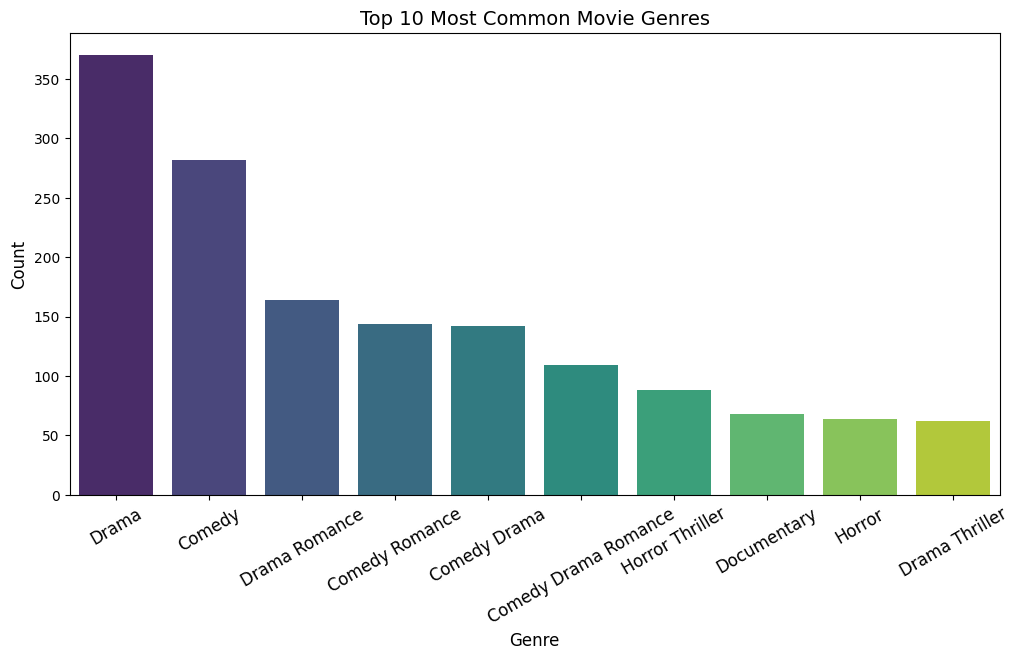

In [36]:
from collections import Counter
# Count occurrences of each genre
all_genres = "|".join(df['genres']).split("|")  # Flatten the genre list
genre_counts = Counter(all_genres)  # Count occurrences of each genre

# Extract the top 10 most common genres
most_common_genres = genre_counts.most_common(10)  
#genres, counts = zip(*most_common_genres)  # Unpack into two lists
genres = [genre for genre, count in most_common_genres]
counts = [count for genre, count in most_common_genres]


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genres), y=list(counts), palette="viridis")

# Improve visualization
plt.xticks(rotation=30, fontsize=12)  # Rotate labels for better readability
plt.title("Top 10 Most Common Movie Genres", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()



## 📊 Analysis of Movie Ratings Distribution

[Text(0.5, 1.0, 'Distribution of Movie Ratings'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Frequency')]

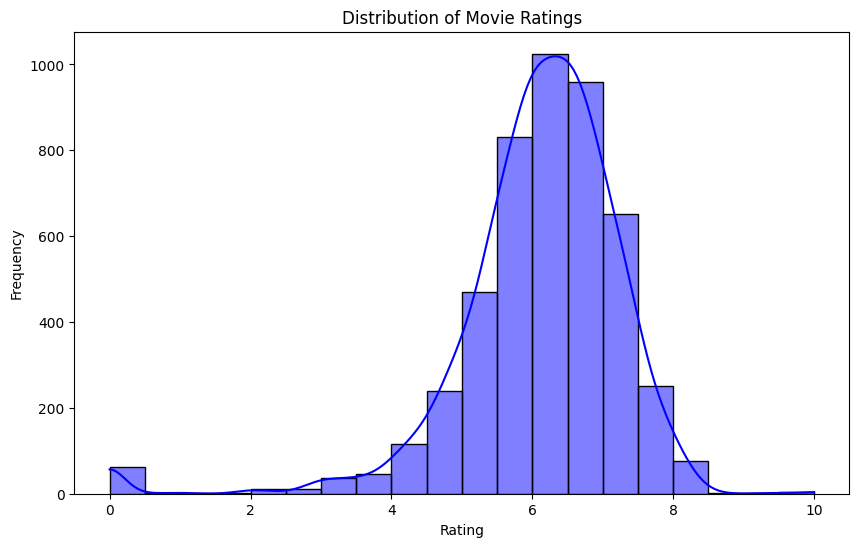

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df["vote_average"], bins=20, kde=True, color="blue").set(title="Distribution of Movie Ratings",xlabel="Rating",ylabel="Frequency")
#plt.title("Distribution of Movie Ratings")
# plt.xlabel("Rating")
# plt.ylabel("Frequency")
# plt.show()


### 📊 Movies with high average rating

C:\Users\MF'\AppData\Local\Temp\ipykernel_2872\2910217045.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_high_rated["title"], x=top_high_rated["vote_average"], palette="Blues_r")


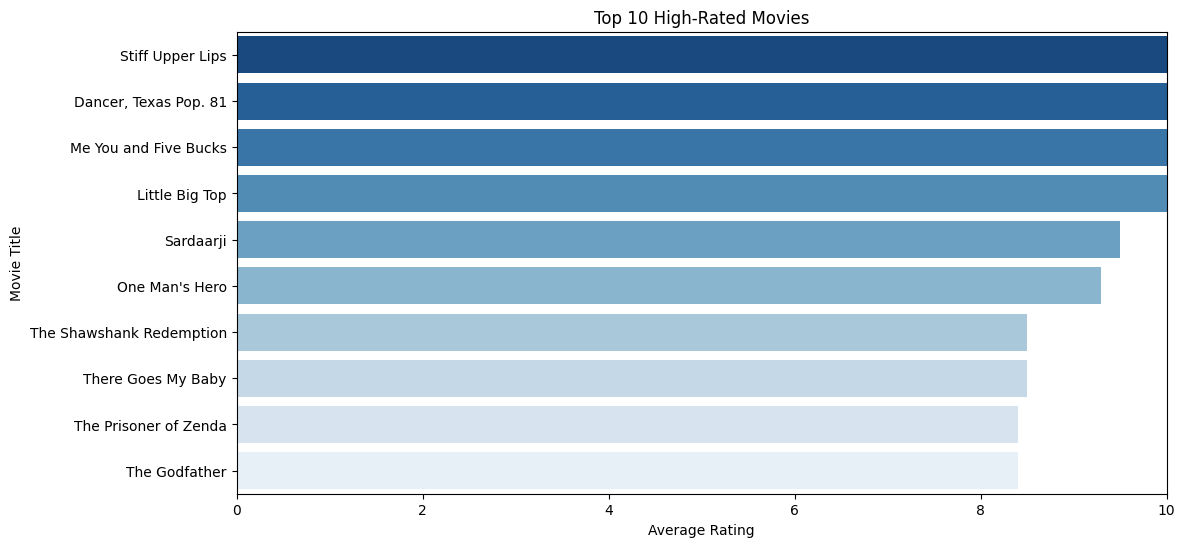

In [ ]:
# Filter movies with high ratings ( rating ≥ 8.0)
high_rated_movies = df[df["vote_average"] >= 8.0]
#print(high_rated_movies)

# Select the top 10 highest-rated movies
top_high_rated = high_rated_movies.nlargest(10, "vote_average")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_high_rated["title"], x=top_high_rated["vote_average"], palette="Blues_r")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 High-Rated Movies")
plt.xlim(0, 10)
plt.show()


### 📊 Movies with low average rating

In [69]:
low_rated_movies = df[df["vote_average"] <= 4.0]

# Display top movies with low ratings
print(low_rated_movies[["title", "vote_average"]].sort_values(by="vote_average").head(10))


                              title  vote_average
1464            Black Water Transit           0.0
3669           Should've Been Romeo           0.0
4269  The Ballad of Gregorio Cortez           0.0
4266  House at the End of the Drive           0.0
4305      Down & Out With The Dolls           0.0
4118         Hum To Mohabbat Karega           0.0
4068                      Sharkskin           0.0
4065                     Mi America           0.0
3960                   The Deported           0.0
4458            Harrison Montgomery           0.0


C:\Users\MF'\AppData\Local\Temp\ipykernel_2872\2371744733.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_low_rated["title"], x=bottom_low_rated["vote_average"], palette="Reds_r")


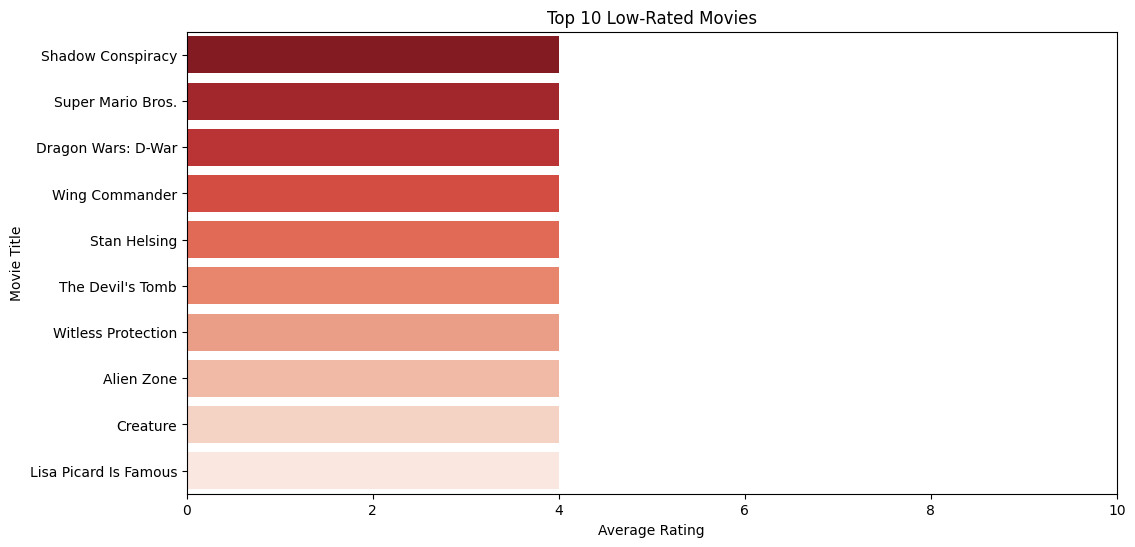

In [68]:
# Filter movies with low ratings ( rating ≤ 4.0)
low_rated_movies = df[df["vote_average"] <= 4.0]

# Select the bottom 10 lowest-rated movies
bottom_low_rated = low_rated_movies.nlargest(10, "vote_average")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=bottom_low_rated["title"], x=bottom_low_rated["vote_average"], palette="Reds_r")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 Low-Rated Movies")
plt.xlim(0, 10)
plt.show()


## 📊 Year vs Average Rating

C:\Users\MF'\AppData\Local\Temp\ipykernel_2872\2172692152.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["year"], y=df["vote_average"], ci=None)


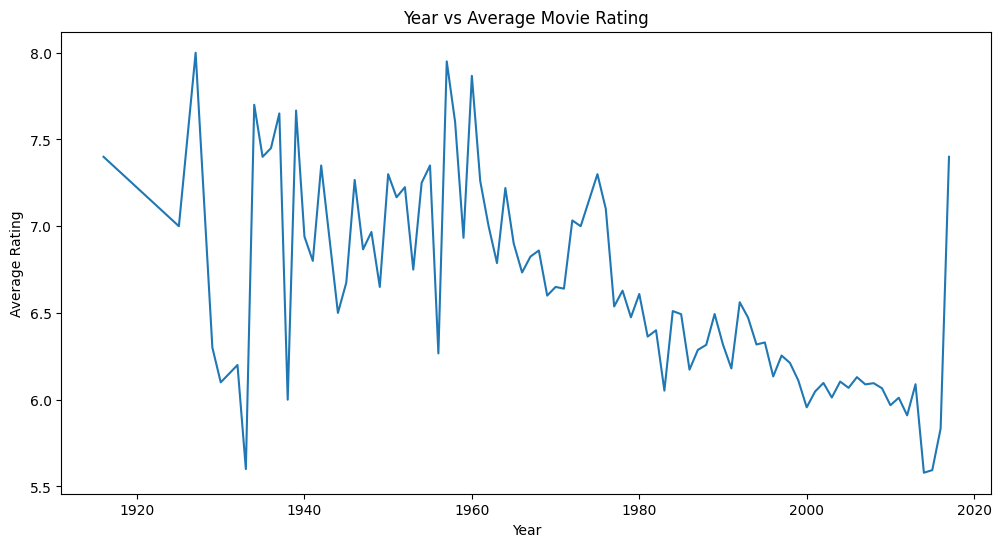

In [71]:

plt.figure(figsize=(12, 6))
sns.lineplot(x=df["year"], y=df["vote_average"], ci=None)
plt.title("Year vs Average Movie Rating")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


### 📊 Genre vs Average Rating

C:\Users\MF'\AppData\Local\Temp\ipykernel_1780\2122923234.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_rating_top.index, x=genre_rating_top.values, palette="coolwarm")


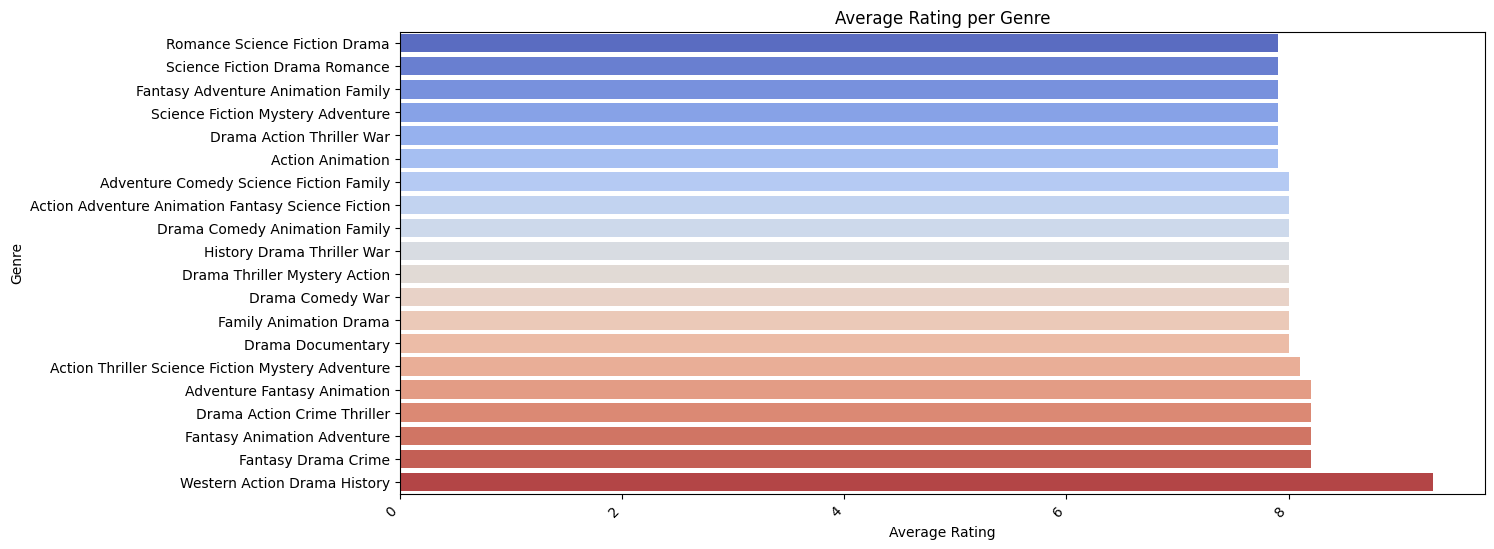

In [42]:
df_exploded = df.assign(genres=df["genres"].str.split("|")).explode("genres")
genre_rating = df_exploded.groupby("genres")["vote_average"].mean().sort_values()

# Show only top 20 genres
top_n = 20 
genre_rating_top = genre_rating[-top_n:]  

plt.figure(figsize=(14, 6))  # Adjust figure size
sns.barplot(y=genre_rating_top.index, x=genre_rating_top.values, palette="coolwarm")

plt.xticks(rotation=45, ha="right")  # Rotate and align labels
plt.title("Average Rating per Genre")
plt.ylabel("Genre")
plt.xlabel("Average Rating")
plt.show()


### 📊 Movie Runtime Distribution

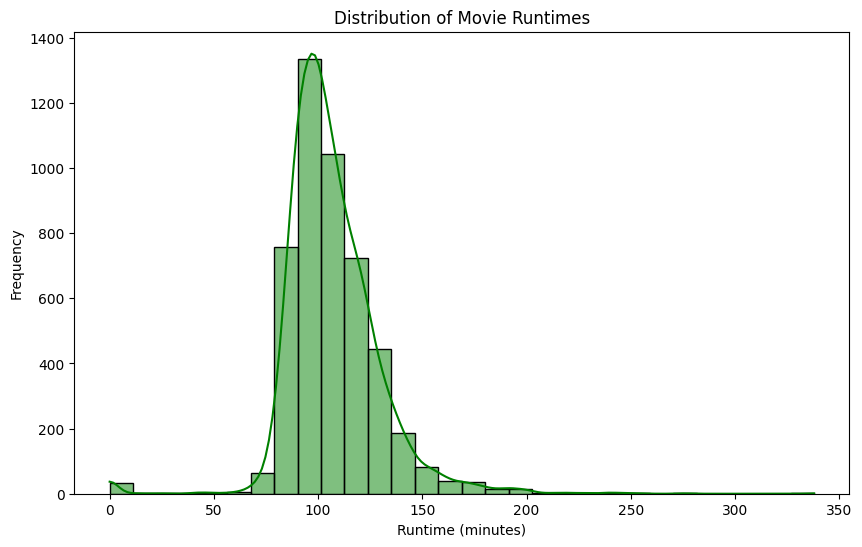

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df["runtime"], bins=30, kde=True, color="green")
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.show()


## 📊 Count of Movies per Year

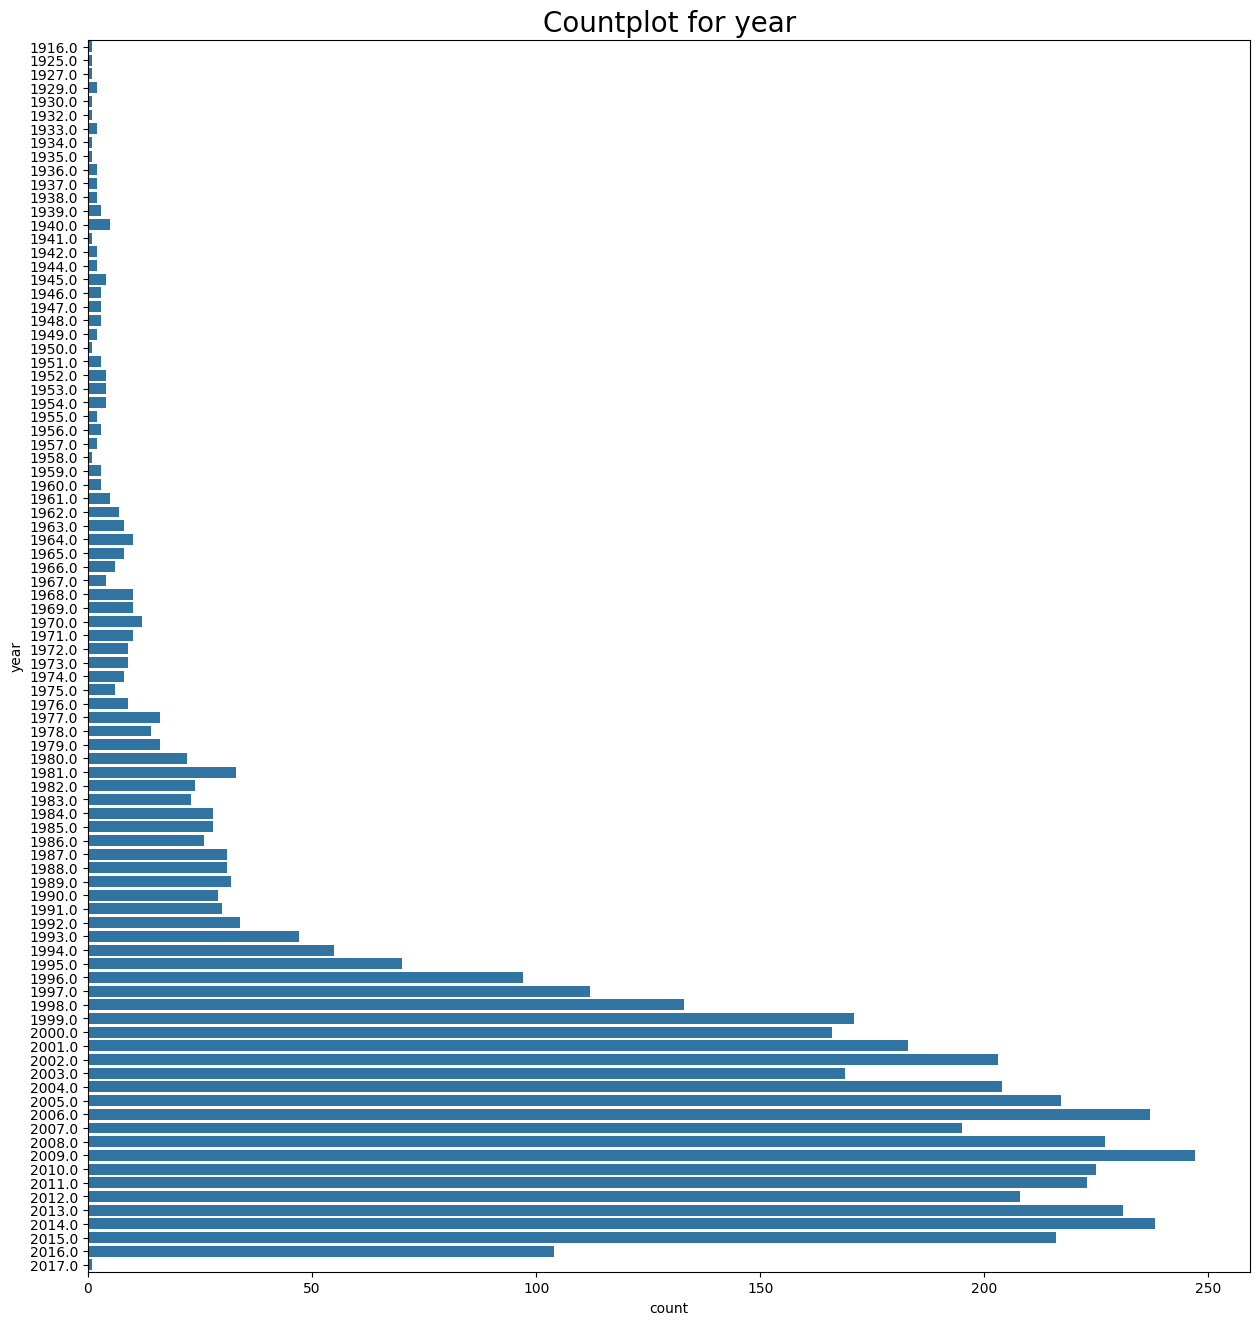

In [58]:
# so its clear that in our dataset we have movies only upto 2017, and most of the movies released in 2011
plt.figure(figsize=[15,16])
sns.countplot(data=df, y='year')
plt.title('Countplot for year', fontsize = 20)
plt.show()

In [ ]:
# df.to_csv('cleaned_dataset.csv', index=False)


# Content based filtering
The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc.

### Term Frequency (TF) and Inverse Document Frequency (IDF)
TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

We will consider genres as an important parameter to recommend user the movie he watches based on generes of movie user has already watched.

For calculating distances, many similarity coefficients can be calculated. Most widely used similarity coefficients are Euclidean, Cosine, Pearson Correlation etc.

**Cosine similarity**
is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.
Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as
We will use cosine distance here. Here we are insterested in similarity. That means higher the value more similar they are. But as the function gives us the distance, we will deduct it from 1.

###  ✅ 1. Train content-based model

In [61]:
def train_content_model(df):
  tfidf = TfidfVectorizer(stop_words='english')
  tfidf_matrix = tfidf.fit_transform(df['genres'].fillna(''))
  similarity_matrix = cosine_similarity(tfidf_matrix)
  return similarity_matrix

In [5]:
# creating a list with all the movie names given in the dataset
list_of_all_titles = df['original_title'].tolist()
print(list_of_all_titles)


NameError: name 'df' is not defined

In [ ]:
# getting the movie name from the user
movie_name = input(' Enter your favourite movie name : ')

In [2]:

import difflib

def find_closest_movie():
    choices = df['title'].tolist()
    
    # Get close matches
    find_close_match = difflib.get_close_matches(movie_name, choices)  
    
    # Return the closest match if found, else return None
    return find_close_match[0] if find_close_match else None  



NameError: name 'df' is not defined

In [ ]:
# from fuzzywuzzy import process
# def find_closest_movie(movie_title,df):
#     choices = df['title'].tolist()
#     best_match, score = process.extractOne(movie_title, choices)
#     return best_match if score > 80 else None


o


### 📌 2. Recommendation Function Based on Genre

In [68]:
# ✅ Get movie recommendations based on genre similarity
def get_recommendations(movie_title, df, similarity_matrix, top_n=5):
    matched_movie = find_closest_movie(movie_title, df)
    
    if matched_movie:
        idx = df[df['title'] == matched_movie].index[0]  # Get movie index
        sim_scores = list(enumerate(similarity_matrix[idx]))  # Compute similarity
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]  # Sort and get top matches
        
        recommended_movie_indices = [i[0] for i in sim_scores]  # Extract indices
        recommendations = df.iloc[recommended_movie_indices][['title']]  # Get titles
        return recommendations
    else:
        return None


### 📌 3. Test the Code

In [71]:
# ✅ Train the genre-based similarity model
similarity_matrix = train_content_model(df)

# ✅ Get movie recommendations for a specific movie
movie_name = "iron man	"
recommended_movies = get_recommendations(movie_name, df, similarity_matrix, top_n=10)



In [73]:
# ✅ Display only movie titles
if recommended_movies is not None:
    print("\n".join(recommended_movies['title'].tolist()))  # Print titles line by line
else:
    print("Movie not found. Try another title.")


Avengers: Age of Ultron
The Avengers
Captain America: Civil War
Iron Man 3
Transformers: Revenge of the Fallen
Transformers: Age of Extinction
TRON: Legacy
Star Trek Into Darkness
Pacific Rim
Transformers: Dark of the Moon
